![data-x](http://oi64.tinypic.com/o858n4.jpg)

---
# Pandas Introduction 
### with Stock Data and Correlation Examples


**Author list:** Alexander Fred-Ojala & Ikhlaq Sidhu

**References / Sources:** 
Includes examples from Wes McKinney and the 10min intro to Pandas


**License Agreement:** Feel free to do whatever you want with this code

___

## What Does Pandas Do?
<img src="https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/pandas-p1.jpg">

## What is a Pandas Table Object?
<img src="https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/pandas-p2.jpg">


# Import packages

In [1]:
# import packages

import pandas as pd

# Extra packages
import numpy as np
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting and styling

# jupyter notebook magic to display plots in output
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6) # make the plots bigger

# Part 1
### Simple creation and manipulation of Pandas objects
**Key Points:** Pandas has two / three main data types:
* Series (similar to numpy arrays, but with index)
* DataFrames (table or spreadsheet with Series in the columns)
* Panels (3D version of DataFrame, not as common)

### It is easy to create a DataFrame

### We use `pd.DataFrame(**inputs**)` and can insert almost any data type as an argument

**Function:** `pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)`

Input data can be a numpy ndarray (structured or homogeneous), dict, or DataFrame. 
Dict can contain Series, arrays, constants, or list-like objects as the values.

In [2]:
# Try it with an array
np.random.seed(0) # set seed for reproducibility

a1 = np.array(np.random.randn(3))
a2 = np.array(np.random.randn(3))
a3 = np.array(np.random.randn(3))

print (a1)
print (a2)
print (a3)

[1.76405235 0.40015721 0.97873798]
[ 2.2408932   1.86755799 -0.97727788]
[ 0.95008842 -0.15135721 -0.10321885]


In [3]:
# Create our first DataFrame w/ an np.array - it becomes a column
df0 = pd.DataFrame(a1)
print(type(df0))
df0

<class 'pandas.core.frame.DataFrame'>


,0
0,1.764052
1,0.400157
2,0.978738


In [4]:
# DataFrame from list of np.arrays

df0 = pd.DataFrame([a1, a2, a3])
df0

# notice that there is no column label, only integer values,
# and the index is set automatically

,0,1,2
0,1.764052,0.400157,0.978738
1,2.240893,1.867558,-0.977278
2,0.950088,-0.151357,-0.103219


In [5]:
# DataFrame from 2D np.array

ax = np.random.randn(9).reshape(3,3)
ax

array([[ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826]])

In [6]:
df0 = pd.DataFrame(ax,columns=['rand_normal_1','Random Again','Third'],
                   index=[100,200,99]) # we can also assign columns and indices, sizes have to match
df0

,rand_normal_1,Random Again,Third
100,0.410599,0.144044,1.454274
200,0.761038,0.121675,0.443863
99,0.333674,1.494079,-0.205158


In [7]:
# DataFrame from a Dictionary

dict1 = {'A':a1, 'B':a2}
df1 = pd.DataFrame(dict1) 
df1
# note that we now have columns without assignment

,A,B
0,1.764052,2.240893
1,0.400157,1.867558
2,0.978738,-0.977278


In [8]:
# We can easily add another column (just as you add values to a dictionary)
df1['C']=a3
df1

,A,B,C
0,1.764052,2.240893,0.950088
1,0.400157,1.867558,-0.151357
2,0.978738,-0.977278,-0.103219


In [9]:
# We can add a list with strings and ints as a column 
df1['L'] = ["Something", 3, "words"]
df1

,A,B,C,L
0,1.764052,2.240893,0.950088,Something
1,0.400157,1.867558,-0.151357,3
2,0.978738,-0.977278,-0.103219,words


# Pandas Series object
### Like an np.array, but we can combine data types and it has its own index
Note: Every column in a DataFrame is a Series

In [12]:
print(df1[['L','A']])

           L         A
0  Something  1.764052
1          3  0.400157
2      words  0.978738


In [13]:
print(type(df1['L']))

<class 'pandas.core.series.Series'>


In [14]:
df1

,A,B,C,L
0,1.764052,2.240893,0.950088,Something
1,0.400157,1.867558,-0.151357,3
2,0.978738,-0.977278,-0.103219,words


In [15]:
# We can also rename columns
df1 = df1.rename(columns = {'L':'Renamed'})
df1

,A,B,C,Renamed
0,1.764052,2.240893,0.950088,Something
1,0.400157,1.867558,-0.151357,3
2,0.978738,-0.977278,-0.103219,words


In [16]:
# We can delete columns
del df1['C']
df1

,A,B,Renamed
0,1.764052,2.240893,Something
1,0.400157,1.867558,3
2,0.978738,-0.977278,words


In [19]:
# or drop columns
df1.drop('A',axis=1,inplace=True) # does not change df1 if we don't set inplace=True

In [20]:
df1

,B,Renamed
0,2.240893,Something
1,1.867558,3
2,-0.977278,words


In [ ]:
df1

In [21]:
# or drop rows
df1.drop(0)

,B,Renamed
1,1.867558,3
2,-0.977278,words


In [22]:
# Example: view only one column
df1['B']

0    2.240893
1    1.867558
2   -0.977278
Name: B, dtype: float64

In [23]:
# Or view several column
df1[['B','Renamed']]

,B,Renamed
0,2.240893,Something
1,1.867558,3
2,-0.977278,words


# Other ways of slicing
In the 10 min Pandas Guide, you will see many ways to view, slice a dataframe

* view/slice by rows, eg `df[1:3]`, etc.

* view by index location, see `df.iloc` (iloc)

* view by ranges of labels, ie index label 2 to 5, or dates feb 3 to feb 25, see `df.loc` (loc)
 
* view a single row by the index `df.xs` (xs) or `df.ix` (ix)

* filtering rows that have certain conditions
* add column
* add row

* How to change the index

and more...

In [24]:
print (df1[0:2])  # ok

          B    Renamed
0  2.240893  Something
1  1.867558          3


In [26]:
df1

,B,Renamed
0,2.240893,Something
1,1.867558,3
2,-0.977278,words


In [25]:
df1.iloc[1,1]

3

In [ ]:
df1

# Part 2
## Finance example: Large Data Frames

### Now, lets get some data in CSV format.

See https://www.quantshare.com/sa-43-10-ways-to-download-historical-stock-quotes-data-for-free


In [27]:
!ls data/

apple.csv  boeing.csv  googl.csv  microsoft.csv  nike.csv


In [33]:
# We can download data from the web by using pd.read_csv
# A CSV file is a comma seperated file
# We can use this 'pd.read_csv' method with urls that host csv files

base_url = 'https://google.com/finance?output=csv&q='

dfg = pd.read_csv('data/googl.csv').drop('Unnamed: 0',axis=1) # Google stock data
dfa = pd.read_csv('data/apple.csv').drop('Unnamed: 0',axis=1)

In [35]:
dfg

,Date,Open,High,Low,Close,Volume
0,19-Jan-18,1138.03,1143.78,1132.50,1143.50,1527554
1,18-Jan-18,1139.35,1140.58,1124.46,1135.97,1374873
2,17-Jan-18,1136.36,1139.32,1123.49,1139.10,1391510
3,16-Jan-18,1140.31,1148.88,1126.66,1130.70,1823100
4,12-Jan-18,1110.10,1131.30,1108.01,1130.65,1929306
5,11-Jan-18,1112.31,1114.85,1106.48,1112.05,1121216
6,10-Jan-18,1107.00,1112.78,1103.98,1110.14,1036655
7,9-Jan-18,1118.44,1118.44,1108.20,1112.79,1340381
8,8-Jan-18,1111.00,1119.16,1110.00,1114.21,1232221
9,5-Jan-18,1103.45,1113.58,1101.80,1110.29,1512526


In [36]:
dfg.head() # show first five values

,Date,Open,High,Low,Close,Volume
0,19-Jan-18,1138.03,1143.78,1132.50,1143.50,1527554
1,18-Jan-18,1139.35,1140.58,1124.46,1135.97,1374873
2,17-Jan-18,1136.36,1139.32,1123.49,1139.10,1391510
3,16-Jan-18,1140.31,1148.88,1126.66,1130.70,1823100
4,12-Jan-18,1110.10,1131.30,1108.01,1130.65,1929306


In [38]:
dfg.tail(3) # last three

,Date,Open,High,Low,Close,Volume
248,25-Jan-17,853.55,858.79,849.74,858.45,1662148
249,24-Jan-17,846.98,851.52,842.28,849.53,1688375
250,23-Jan-17,831.61,845.54,828.70,844.43,2457377


In [40]:
dfg.columns # returns columns, can be used to loop over

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [43]:
dfg.index # return

RangeIndex(start=0, stop=251, step=1)

# Convert the index to pandas datetime object

In [44]:
dfg['Date'][0]

'19-Jan-18'

In [45]:
type(dfg['Date'][0])

str

In [48]:
dfg.index = pd.to_datetime(dfg['Date']) # set index

In [49]:
dfg.drop(['Date'],axis=1,inplace=True)

In [50]:
dfg.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-19,1138.03,1143.78,1132.50,1143.50,1527554
2018-01-18,1139.35,1140.58,1124.46,1135.97,1374873
2018-01-17,1136.36,1139.32,1123.49,1139.10,1391510
2018-01-16,1140.31,1148.88,1126.66,1130.70,1823100
2018-01-12,1110.10,1131.30,1108.01,1130.65,1929306


In [51]:
print(type(dfg.index[0]))
dfg.index[0]

<class 'pandas._libs.tslib.Timestamp'>


Timestamp('2018-01-19 00:00:00')

In [52]:
dfg.index

DatetimeIndex(['2018-01-19', '2018-01-18', '2018-01-17', '2018-01-16',
               '2018-01-12', '2018-01-11', '2018-01-10', '2018-01-09',
               '2018-01-08', '2018-01-05',
               ...
               '2017-02-03', '2017-02-02', '2017-02-01', '2017-01-31',
               '2017-01-30', '2017-01-27', '2017-01-26', '2017-01-25',
               '2017-01-24', '2017-01-23'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [59]:
dfg['2017-08':'2017-06']

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-31,946.30,957.20,946.25,955.24,1693313
2017-08-30,935.67,945.86,934.05,943.63,1120342
2017-08-29,919.95,938.19,919.31,935.75,1158576
2017-08-28,931.88,934.85,926.11,928.13,1049397
2017-08-25,939.21,940.73,930.10,930.50,1187313
2017-08-24,943.71,946.31,930.74,936.89,1294559
2017-08-23,937.00,945.42,935.24,942.58,1134464
2017-08-22,926.96,941.96,926.17,940.40,1775099
2017-08-21,925.77,928.25,918.60,920.87,1301243


# Attributes & general statitics of a Pandas DataFrame

In [60]:
dfg.shape # 251 business days last year

(251, 5)

In [61]:
dfg.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [62]:
dfg.size

1255

In [63]:
# Some general statistics

dfg.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,954.393944,960.413944,948.097490,954.886295,1.618960e+06
std,79.500261,80.542821,78.730193,79.808157,6.907057e+05
min,815.000000,822.390000,812.050000,815.240000,7.268980e+05
25%,872.105000,877.190000,867.945000,875.650000,1.191540e+06
50%,951.350000,959.560000,945.310000,954.720000,1.440982e+06
75%,1005.335000,1008.630000,999.200000,1005.360000,1.787760e+06
max,1140.310000,1148.880000,1132.500000,1143.500000,5.933602e+06


In [64]:
# Boolean indexing
dfg['Open'][dfg['Open']>1130] # check what dates the opening

Date
2018-01-19    1138.03
2018-01-18    1139.35
2018-01-17    1136.36
2018-01-16    1140.31
Name: Open, dtype: float64

In [66]:
# Check where Open, High, Low and Close where greater than 1130
dfg[dfg>1000].drop('Volume',axis=1)

,Open,High,Low,Close
Date,,,,
2018-01-19,1138.03,1143.78,1132.50,1143.50
2018-01-18,1139.35,1140.58,1124.46,1135.97
2018-01-17,1136.36,1139.32,1123.49,1139.10
2018-01-16,1140.31,1148.88,1126.66,1130.70
2018-01-12,1110.10,1131.30,1108.01,1130.65
2018-01-11,1112.31,1114.85,1106.48,1112.05
2018-01-10,1107.00,1112.78,1103.98,1110.14
2018-01-09,1118.44,1118.44,1108.20,1112.79
2018-01-08,1111.00,1119.16,1110.00,1114.21


In [ ]:
# If you want the values in an np array
dfg.values

## .loc()

In [67]:
# Getting a cross section with .loc - BY VALUES of the index and columns
# df.loc[a:b, x:y], by rows and column location

# Note: You have to know indices and columns

dfg.loc['2017-08-31':'2017-08-21','Open':'Low']

,Open,High,Low
Date,,,
2017-08-31,946.30,957.20,946.25
2017-08-30,935.67,945.86,934.05
2017-08-29,919.95,938.19,919.31
2017-08-28,931.88,934.85,926.11
2017-08-25,939.21,940.73,930.10
2017-08-24,943.71,946.31,930.74
2017-08-23,937.00,945.42,935.24
2017-08-22,926.96,941.96,926.17
2017-08-21,925.77,928.25,918.60


## .iloc()

In [69]:
# .iloc slicing at specific location - BY POSITION in the table
# Recall:
# dfg[a:b] by rows
# dfg[[col]] or df[[col1, col2]] by columns
# df.loc[a:b, x:y], by index and column values + location
# df.iloc[3:5,0:2], numeric position in table

dfg.iloc[1:4,3:5] # 2nd to 4th row, 4th to 5th column

,Close,Volume
Date,,
2018-01-18,1135.97,1374873
2018-01-17,1139.10,1391510
2018-01-16,1130.70,1823100


### More Basic Statistics

In [71]:
# We can change the index sorting
dfg.sort_index(axis=0, ascending=True).head() # starts a year ago

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-23,831.61,845.54,828.70,844.43,2457377
2017-01-24,846.98,851.52,842.28,849.53,1688375
2017-01-25,853.55,858.79,849.74,858.45,1662148
2017-01-26,859.05,861.00,850.52,856.98,3493251
2017-01-27,859.00,867.00,841.90,845.03,3752497


In [72]:
# sort by value
dfg.sort_values(by='Open')[0:10]

,Open,High,Low,Close,Volume
Date,,,,,
2017-02-02,815.00,824.56,812.05,818.26,1689179
2017-01-31,819.50,823.07,813.40,820.19,2020180
2017-02-06,820.92,822.39,814.29,821.62,1350875
2017-02-03,823.13,826.13,819.35,820.13,1528095
2017-02-01,824.00,824.00,812.25,815.24,2251047
2017-02-07,825.50,831.92,823.29,829.23,1666605
2017-03-27,828.09,841.38,824.30,838.51,1935211
2017-02-08,830.53,834.25,825.11,829.88,1302225
2017-01-23,831.61,845.54,828.70,844.43,2457377


# Boolean

In [73]:
dfg[dfg>1115].head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-19,1138.03,1143.78,1132.50,1143.50,1527554
2018-01-18,1139.35,1140.58,1124.46,1135.97,1374873
2018-01-17,1136.36,1139.32,1123.49,1139.10,1391510
2018-01-16,1140.31,1148.88,1126.66,1130.70,1823100
2018-01-12,NaN,1131.30,NaN,1130.65,1929306
2018-01-11,NaN,NaN,NaN,NaN,1121216
2018-01-10,NaN,NaN,NaN,NaN,1036655
2018-01-09,1118.44,1118.44,NaN,NaN,1340381
2018-01-08,NaN,1119.16,NaN,NaN,1232221


In [74]:
# we can also drop all NaN values
dfg[dfg>1115].head(10).dropna()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-19,1138.03,1143.78,1132.50,1143.50,1527554
2018-01-18,1139.35,1140.58,1124.46,1135.97,1374873
2018-01-17,1136.36,1139.32,1123.49,1139.10,1391510
2018-01-16,1140.31,1148.88,1126.66,1130.70,1823100


In [76]:
dfg2 = dfg # make a copy and not a view
dfg2 is dfg

True

### Setting Values


In [77]:
# Recall
dfg.head(4)

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-19,1138.03,1143.78,1132.50,1143.50,1527554
2018-01-18,1139.35,1140.58,1124.46,1135.97,1374873
2018-01-17,1136.36,1139.32,1123.49,1139.10,1391510
2018-01-16,1140.31,1148.88,1126.66,1130.70,1823100


In [78]:
# All the ways to view
# can also be used to set values
# good for data normalization

dfg['Volume'] = dfg['Volume']/100000.0
dfg.head(4)

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-19,1138.03,1143.78,1132.50,1143.50,15.27554
2018-01-18,1139.35,1140.58,1124.46,1135.97,13.74873
2018-01-17,1136.36,1139.32,1123.49,1139.10,13.91510
2018-01-16,1140.31,1148.88,1126.66,1130.70,18.23100


### More Statistics and Operations

In [79]:
# mean by column, also try var() for variance
dfg.mean()   

Open      954.393944
High      960.413944
Low       948.097490
Close     954.886295
Volume     16.189597
dtype: float64

In [80]:
dfg[0:5].mean(axis = 1) # row means of first five rows

Date
2018-01-19    914.617108
2018-01-18    910.821746
2018-01-17    910.437020
2018-01-16    912.956200
2018-01-12    899.870612
dtype: float64

# PlotCorrelation
### Load several stocks

In [81]:
# Reload
dfg = pd.read_csv('data/googl.csv').drop('Unnamed: 0',axis=1) # Google stock data
dfa = pd.read_csv('data/apple.csv').drop('Unnamed: 0',axis=1) # Apple stock data
dfm = pd.read_csv('data/microsoft.csv').drop('Unnamed: 0',axis=1) # Google stock data
dfn = pd.read_csv('data/nike.csv').drop('Unnamed: 0',axis=1) # Apple stock data
dfb = pd.read_csv('data/boeing.csv').drop('Unnamed: 0',axis=1) # Apple stock data

In [83]:
dfb.head()

,Date,Open,High,Low,Close,Volume
0,19-Jan-18,341.67,344.00,335.75,337.73,7264401
1,18-Jan-18,350.70,350.83,339.15,340.16,9458634
2,17-Jan-18,337.73,352.23,336.41,351.01,9699917
3,16-Jan-18,339.90,347.73,331.33,335.16,12305475
4,12-Jan-18,330.38,336.88,330.38,336.21,6559284


In [84]:
# Rename columns
dfg = dfg.rename(columns = {'Close':'GOOG'})
#print (dfg.head())

dfa = dfa.rename(columns = {'Close':'AAPL'})
#print (dfa.head())

dfm = dfm.rename(columns = {'Close':'MSFT'})
#print (dfm.head())

dfn = dfn.rename(columns = {'Close':'NKE'})
#print (dfn.head())

dfb = dfb.rename(columns = {'Close':'BA'})

In [85]:
dfb.head(2)

,Date,Open,High,Low,BA,Volume
0,19-Jan-18,341.67,344.00,335.75,337.73,7264401
1,18-Jan-18,350.70,350.83,339.15,340.16,9458634


In [86]:
# Lets merge some tables
# They will all merge on the common column Date

df = dfg[['Date','GOOG']].merge(dfa[['Date','AAPL']])
df = df.merge(dfm[['Date','MSFT']])
df = df.merge(dfn[['Date','NKE']])
df = df.merge(dfb[['Date','BA']])

df.head()

,Date,GOOG,AAPL,MSFT,NKE,BA
0,19-Jan-18,1143.50,178.46,90.00,67.21,337.73
1,18-Jan-18,1135.97,179.26,90.10,64.11,340.16
2,17-Jan-18,1139.10,179.10,90.14,63.81,351.01
3,16-Jan-18,1130.70,176.19,88.35,63.42,335.16
4,12-Jan-18,1130.65,177.09,89.60,64.67,336.21


In [87]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,GOOG,AAPL,MSFT,NKE,BA
Date,,,,,
2018-01-19,1143.50,178.46,90.00,67.21,337.73
2018-01-18,1135.97,179.26,90.10,64.11,340.16
2018-01-17,1139.10,179.10,90.14,63.81,351.01
2018-01-16,1130.70,176.19,88.35,63.42,335.16
2018-01-12,1130.65,177.09,89.60,64.67,336.21


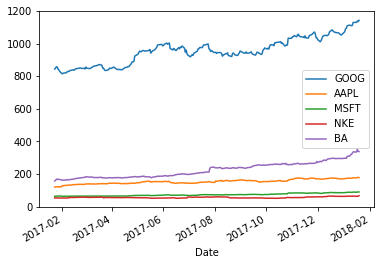

In [88]:
df.plot()

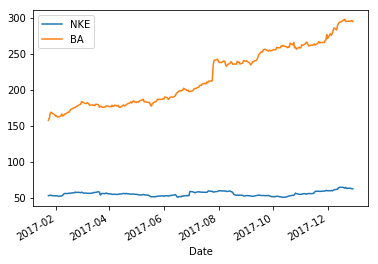

In [89]:
df['2017'][['NKE','BA']].plot()

In [92]:
# show a correlation matrix (pearson)
crl = df.corr()
crl

,GOOG,AAPL,MSFT,NKE,BA
GOOG,1.000000,0.893159,0.935084,0.448143,0.854897
AAPL,0.893159,1.000000,0.928710,0.472961,0.888494
MSFT,0.935084,0.928710,1.000000,0.540521,0.951412
NKE,0.448143,0.472961,0.540521,1.000000,0.537669
BA,0.854897,0.888494,0.951412,0.537669,1.000000


In [93]:
crl.sort_values(by='GOOG',ascending=False)

,GOOG,AAPL,MSFT,NKE,BA
GOOG,1.000000,0.893159,0.935084,0.448143,0.854897
MSFT,0.935084,0.928710,1.000000,0.540521,0.951412
AAPL,0.893159,1.000000,0.928710,0.472961,0.888494
BA,0.854897,0.888494,0.951412,0.537669,1.000000
NKE,0.448143,0.472961,0.540521,1.000000,0.537669


In [94]:
s = crl.unstack()
so = s.sort_values(ascending=False)
so[so<1]

MSFT  BA      0.951412
BA    MSFT    0.951412
GOOG  MSFT    0.935084
MSFT  GOOG    0.935084
      AAPL    0.928710
AAPL  MSFT    0.928710
      GOOG    0.893159
GOOG  AAPL    0.893159
AAPL  BA      0.888494
BA    AAPL    0.888494
GOOG  BA      0.854897
BA    GOOG    0.854897
MSFT  NKE     0.540521
NKE   MSFT    0.540521
BA    NKE     0.537669
NKE   BA      0.537669
      AAPL    0.472961
AAPL  NKE     0.472961
NKE   GOOG    0.448143
GOOG  NKE     0.448143
dtype: float64

In [95]:
df.mean()

GOOG    954.886295
AAPL    153.492351
MSFT     73.316056
NKE      56.284861
BA      223.678287
dtype: float64

In [97]:
sim=df-df.mean()
sim.tail()

,GOOG,AAPL,MSFT,NKE,BA
Date,,,,,
2017-01-27,-109.856295,-31.542351,-7.536056,-3.094861,-55.978287
2017-01-26,-97.906295,-31.552351,-9.046056,-2.634861,-54.558287
2017-01-25,-96.436295,-31.612351,-9.636056,-2.424861,-56.318287
2017-01-24,-105.356295,-33.522351,-9.796056,-2.834861,-63.128287
2017-01-23,-110.456295,-33.412351,-10.356056,-3.044861,-65.838287


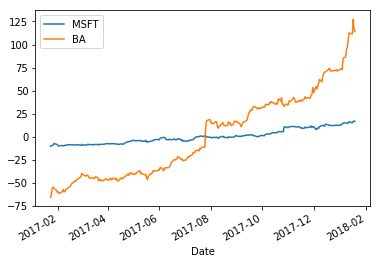

In [98]:
sim[['MSFT','BA']].plot()